In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1718,ham,"As in missionary hook up, doggy hook up, stand...",NaN,NaN,NaN
364,ham,Good afternoon sunshine! How dawns that day ? ...,NaN,NaN,NaN
4788,ham,We're on the opposite side from where we dropp...,NaN,NaN,NaN
1238,ham,"Dear relieved of westonzoyland, all going to p...",NaN,NaN,NaN
494,ham,Are you free now?can i call now?,NaN,NaN,NaN


In [4]:
#data cleaning 
#EDA
#Text Preprocessing 
# model building 
#e valuation
# improvements
# website
#deploy


# data Cleaning 

In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

In [9]:
# drop  last three columns coz have less data  and un useful data 
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1':'Target','v2':'text'},inplace=True)

In [12]:
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['Target'].unique()

array(['ham', 'spam'], dtype=object)

# Encoding 

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
df['Target']=encoder.fit_transform(df['Target'])

In [17]:
df['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5572, dtype: int32

In [18]:
# Missing values

In [19]:
df.isnull().sum()


Target    0
text      0
dtype: int64

no missing values

In [21]:
# checking for duplicates values 
df.duplicated().sum()

403

In [22]:
# dropping duplicates values
df=df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

0

# EDA

In [25]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x20c7842b7a0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

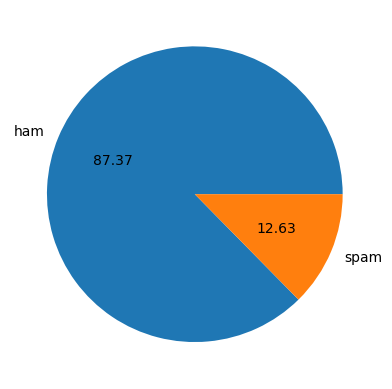

In [26]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

No of ham is more than Spam , ham is 87.37 % and spam is only 12.63 %

In [29]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import nltk  #(natural language tool kit )

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91952\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
df['Num__of_Characters']=df['text'].apply(len)

In [33]:
df

,Target,text,Num__of_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [34]:
# calculating words in  text
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)) )

In [35]:
df.sample(10)

,Target,text,Num__of_Characters,num_words
2180,0,Babe ! How goes that day ? What are you doing ...,154,38
4997,0,Can you talk with me..,22,6
4899,1,"ou are guaranteed the latest Nokia Phone, a 40...",146,30
550,0,Imagine you finally get to sink into that bath...,281,59
4782,0,Especially since i talk about boston all up in...,147,32
3809,0,"Aight, can you text me the address?",35,9
2165,0,I'm not coming home 4 dinner.,29,8
400,1,FREE RINGTONE text FIRST to 87131 for a poly o...,158,35
1020,0,Good afternoon on this glorious anniversary da...,224,46
4060,0,"Aight I've been set free, think you could text...",138,35


In [36]:
# calculating sentences in  text
df['text'].apply(lambda x: nltk.sent_tokenize(x) )

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [37]:
# calculating sentences in  text
df['num_sentnce'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)) )

In [38]:
df

,Target,text,Num__of_Characters,num_words,num_sentnce
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [39]:
df.describe()

,Target,Num__of_Characters,num_words,num_sentnce
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


<Axes: xlabel='Num__of_Characters', ylabel='Count'>

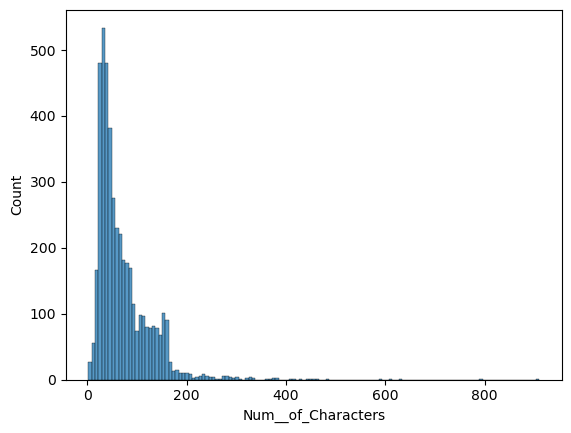

In [40]:
# ham
sns.histplot(data=df,x=df[df['Target']==0]['Num__of_Characters'])

<Axes: xlabel='Num__of_Characters', ylabel='Count'>

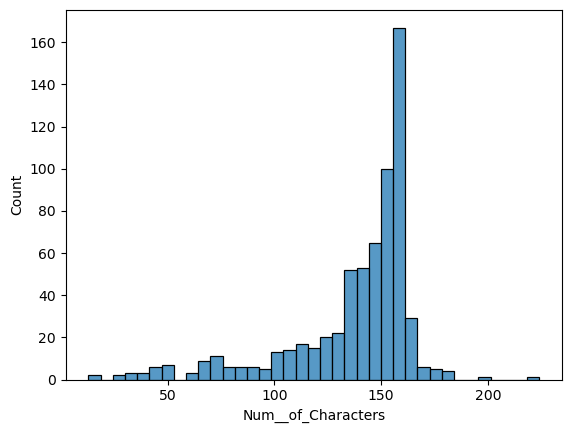

In [41]:
# spam
sns.histplot(data=df,x=df[df['Target']==1]['Num__of_Characters'])

The No of characters used in more than spam 

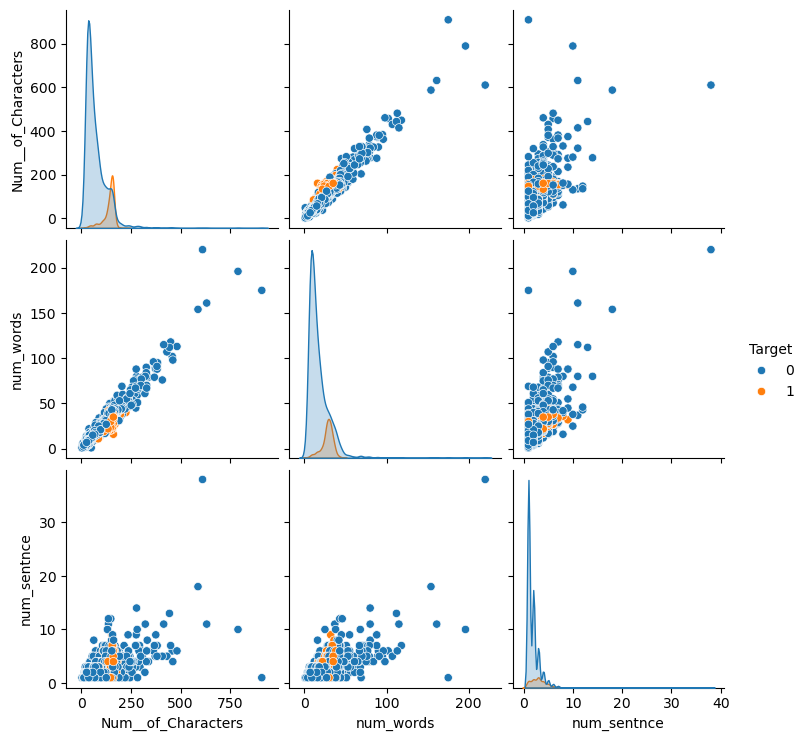

In [43]:
sns.pairplot(df,hue='Target')

In [44]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                      Target  Num__of_Characters  num_words  num_sentnce
Target              1.000000            0.384717   0.262912     0.263939
Num__of_Characters  0.384717            1.000000   0.965760     0.624139
num_words           0.262912            0.965760   1.000000     0.679971
num_sentnce         0.263939            0.624139   0.679971     1.000000


<Axes: >

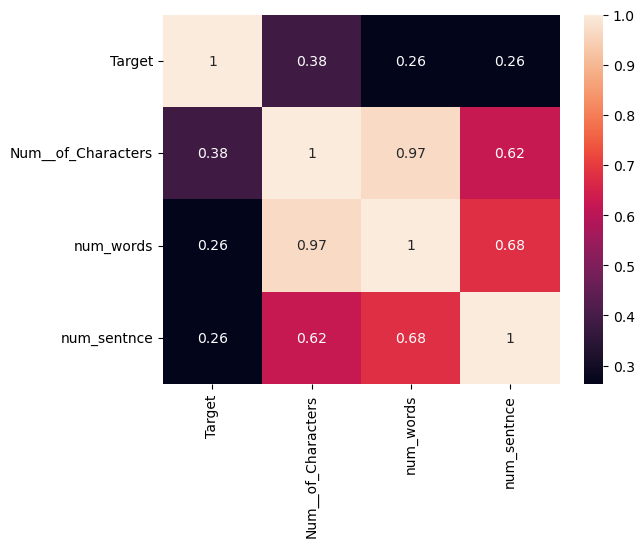

In [45]:
sns.heatmap(correlation_matrix,annot=True)

The indepemdent variables are highly coreelated to each other so we will take one column we go for
Num_of_characters coz it have high correlation with Target Feature

# Data / Text Preprocessing 



In [48]:
#lower case
# Tokenization
#removing Special characters
# removing stop words and punctuations
# stemming

In [49]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')
 # convert the words into root words 

'love'

In [50]:
from nltk.corpus import stopwords
import string
def transform (text):
    text=text.lower()  #lower case 
    text=nltk.word_tokenize(text) # tokenization
    y=[]
    for i in text: # removing Special characters
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text : # removing stop words and punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
         y.append(ps.stem(i))
    return ' '.join(y)
        
    
    

In [51]:
transform('did you like my ml presentation')


'like ml present'

In [52]:
df['tansform_text']=df['text'].apply(transform)

In [53]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc=wc.generate(df[df['Target']==1]['tansform_text'].str.cat(sep= ' '))

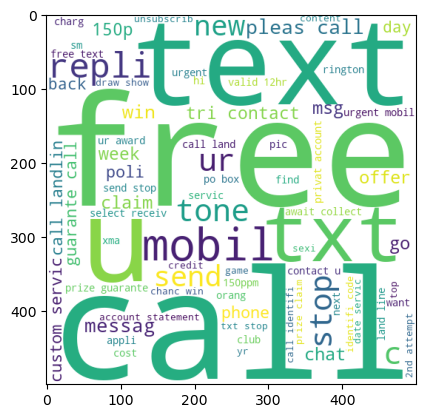

In [55]:
plt.imshow(spam_wc)

In [56]:
ham_wc=wc.generate(df[df['Target']==0]['tansform_text'].str.cat(sep= ' '))

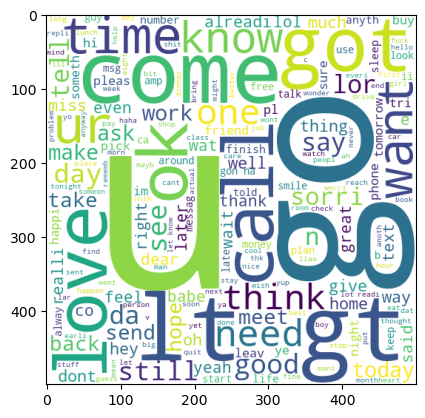

In [57]:
plt.imshow(ham_wc)

In [58]:
spam_collection=[]
for msg in df[df['Target']==1]['tansform_text'].tolist():
    for word in msg.split() :
        spam_collection.append(word)

In [59]:
len(spam_collection)

9939

In [60]:
from collections  import Counter
a=Counter(spam_collection).most_common(30)

In [61]:
a=pd.DataFrame(a)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

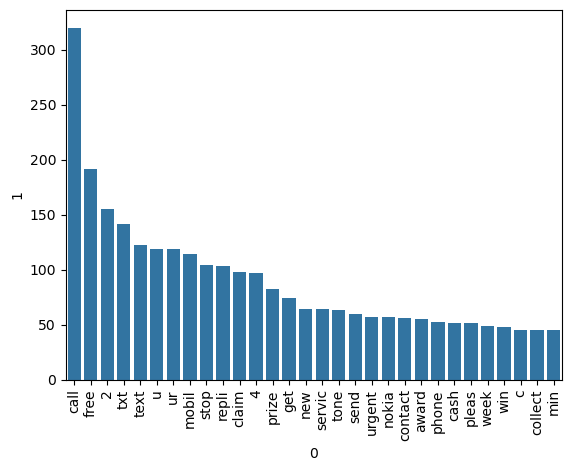

In [62]:
sns.barplot(x=a[0],y=a[1])
plt.xticks(rotation='vertical')

In [63]:
ham_collection=[]
for msg in df[df['Target']==0]['tansform_text'].tolist():
    for word in msg.split() :
        ham_collection.append(word)

In [64]:
from collections  import Counter
a=Counter(ham_collection).most_common(30)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

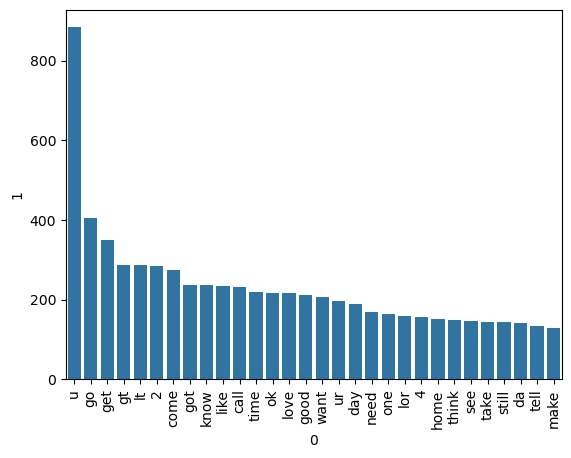

In [65]:
a=pd.DataFrame(a)
sns.barplot(x=a[0],y=a[1])
plt.xticks(rotation='vertical')

# Model  Building

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [70]:
X=tfidf.fit_transform(df['tansform_text']).toarray()

In [74]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
X.shape

(5169, 3000)

In [78]:
y=df['Target'].values

In [80]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [82]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2)

In [84]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [86]:
GNB=GaussianNB()
MNB=MultinomialNB()
BNB=BernoulliNB()

In [88]:
GNB.fit(xtrain,ytrain)
y_predict1=GNB.predict(xtest)
print(accuracy_score(ytest,y_predict1))
print(confusion_matrix(ytest,y_predict1))
print(precision_score(ytest,y_predict1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [90]:

BNB.fit(xtrain,ytrain)

y_predict2=BNB.predict(xtest)
print(accuracy_score(ytest,y_predict2))
print(confusion_matrix(ytest,y_predict2))
print(precision_score(ytest,y_predict2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [92]:
MNB.fit(xtrain,ytrain)
y_predict3=MNB.predict(xtest)
print(accuracy_score(ytest,y_predict3))
print(confusion_matrix(ytest,y_predict3))
print(precision_score(ytest,y_predict3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
# wee tried both Countvectorizer and tfidf both tfidf giving better precison and accuracy 
# so we are using TFidf and Multinomial NB

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB


In [96]:
svc=SVC(kernel='sigmoid',gamma=1.0)
KNC=KNeighborsClassifier()
LR=LogisticRegression(solver='liblinear',penalty='l1')
DT=DecisionTreeClassifier(max_depth=5)
RF=RandomForestClassifier(n_estimators=50,random_state=2)
ABC=AdaBoostClassifier(n_estimators=50,random_state=2)
BC=BaggingClassifier(n_estimators=50,random_state=2)
ETC=ExtraTreesClassifier(n_estimators=50,random_state=2)
GBC=GradientBoostingClassifier(n_estimators=50,random_state=2)
XGB=XGBClassifier(n_estimators=50,random_state=2)
MNB=MultinomialNB()



In [104]:
clf={
    'svc':svc,
    'knc':KNC,
    'LR':LR,
    'dt':DT,
    'rf':RF,
    'abc':ABC,
    'Bc':BC,
    'etc':ETC,
    'gbc':GBC,
    'xgb':XGB,
    'MNB':MNB
    
}

In [98]:
def train_classifier(clf,xtrain,ytrain,xtest,ytest):
   clf.fit(xtrain,ytrain)
   y_predict=clf.predict(xtest)
   accuracy=accuracy_score(ytest,y_predict)
   precision=precision_score(ytest,y_predict)

   return accuracy , precision



In [100]:
train_classifier(MNB,xtrain,ytrain,xtest,ytest)

(0.9709864603481625, 1.0)

In [106]:
clf.items()

dict_items([('svc', SVC(gamma=1.0, kernel='sigmoid')), ('knc', KNeighborsClassifier()), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('dt', DecisionTreeClassifier(max_depth=5)), ('rf', RandomForestClassifier(n_estimators=50, random_state=2)), ('abc', AdaBoostClassifier(random_state=2)), ('Bc', BaggingClassifier(n_estimators=50, random_state=2)), ('etc', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('gbc', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              ma

In [108]:

results = []
for name, model in clf.items():
    current_acc, current_prec = train_classifier(model, xtrain, ytrain, xtest, ytest)
    results.append({'Model': name, 'Accuracy': current_acc, 'Precision': current_prec})

results_df = pd.DataFrame(results)
print(results_df)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


   Model  Accuracy  Precision
0    svc  0.975822   0.974790
1    knc  0.905222   1.000000
2     LR  0.958414   0.970297
3     dt  0.929400   0.828283
4     rf  0.975822   0.982906
5    abc  0.960348   0.929204
6     Bc  0.958414   0.868217
7    etc  0.974855   0.974576
8    gbc  0.946809   0.919192
9    xgb  0.967118   0.933333
10   MNB  0.970986   1.000000


In [ ]:
results2 = []
for name, model in clf.items():
    current_acc, current_prec = train_classifier(model, xtrain, ytrain, xtest, ytest)
    results2.append({'Model': name, 'Accuracy': current_acc, 'Precision': current_prec})

results2_df = pd.DataFrame(results2)
print(results2_df)

In [ ]:
print(results_df.sort_values(by='Accuracy', ascending=False))


In [110]:




#results_df['Precision max dept=3000']=results2_df['Precision']
 #results_df['Accuracy max dept=3000']=results2_df['Accuracy']


print(results_df.sort_values(by='Precision',ascending=False))


   Model  Accuracy  Precision
1    knc  0.905222   1.000000
10   MNB  0.970986   1.000000
4     rf  0.975822   0.982906
0    svc  0.975822   0.974790
7    etc  0.974855   0.974576
2     LR  0.958414   0.970297
9    xgb  0.967118   0.933333
5    abc  0.960348   0.929204
8    gbc  0.946809   0.919192
6     Bc  0.958414   0.868217
3     dt  0.929400   0.828283


In [114]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(MNB, open('model.pkl','wb'))